In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
data = pd.read_csv(
    r'C:\Users\25492\Desktop\2024年第四届长三角高校数学建模竞赛赛题\2024长三角选题B：人工智能范式的物理化学家\data.csv')
data

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,1,2,-587.360784,-0.331308,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.325400,2204.278945,21606.405010,16746.254820,213.098000
1,2,2,-587.359946,-0.329316,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.769380,2076.587979,17602.163970,2199.601888,506.651409
2,3,2,-587.366330,-0.324781,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.248220,497.946181,16759.458980,17687.268850,575.511247
3,4,1,-534.430563,-0.323772,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.522100,2518.506658,37359.799660,5784.140268,530.878047
4,5,2,-838.152165,-0.323753,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.776720,2971.889099,36697.285060,17496.357370,640.112190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,-419.504748,-0.152722,-0.025667,0.169241,0.000055,0.127055,-419.459364,79.538702,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,199997,1,-419.494291,-0.152693,-0.018547,0.168173,0.000059,0.134146,-419.448829,78.753240,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,199998,2,-406.836695,-0.152680,-0.041361,0.233604,0.000067,0.111320,-406.786417,108.276082,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,199999,1,-440.592967,-0.152678,-0.008569,0.180136,0.000060,0.144109,-440.548209,76.762032,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596


In [28]:
X = data.iloc[:, 5:] # x1-x100
Y = data.iloc[:, 1] # class
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,3.690374,1578.326219,259.236613,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.325400,2204.278945,21606.405010,16746.254820,213.098000
1,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,3.720941,1422.590010,39.474211,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.769380,2076.587979,17602.163970,2199.601888,506.651409
2,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,3.111271,1702.112816,887.859456,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.248220,497.946181,16759.458980,17687.268850,575.511247
3,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,2.187990,1432.356648,33.815618,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.522100,2518.506658,37359.799660,5784.140268,530.878047
4,0.169158,0.000067,0.284934,-838.102038,90.368137,-838.113854,-838.101093,4.485350,1871.002915,225.397080,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.776720,2971.889099,36697.285060,17496.357370,640.112190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.169241,0.000055,0.127055,-419.459364,79.538702,-419.468874,-419.458420,3.991411,1364.165906,840.027189,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,0.168173,0.000059,0.134146,-419.448829,78.753240,-419.458752,-419.447884,5.784022,1296.958436,646.581933,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,0.233604,0.000067,0.111320,-406.786417,108.276082,-406.797683,-406.785473,1.670824,2129.572047,371.421698,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,0.180136,0.000060,0.144109,-440.548209,76.762032,-440.558158,-440.547265,4.513365,1157.687053,323.882553,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596


# 1.相关系数分析

In [4]:
n = X.shape[1]
S = np.zeros((n, 2))
P = np.zeros((n, 2))
for i in range(n):
    S[i, 0]= np.abs(stats.spearmanr(X.iloc[:, i], Y)[0])  # 斯皮尔曼相关系数
    S[i, 1] = stats.spearmanr(X.iloc[:, i], Y)[1]  # 斯皮尔曼p值

In [5]:
# 斯皮尔曼系数处理
S = pd.DataFrame(S, columns=['correlation', 'p_value'])
S = S[S['p_value'] <= 0.05]  # 只选择置信度小于0.05的指标
S = S.sort_values(by=['correlation'],ascending=False) # 进行排序
S.index = X.iloc[:,S.index].columns
print(S)
#S.to_csv('class斯皮尔曼.csv')

     correlation       p_value
x4      0.650463  0.000000e+00
x7      0.650463  0.000000e+00
x6      0.650461  0.000000e+00
x5      0.610517  0.000000e+00
x9      0.560761  0.000000e+00
x2      0.406322  0.000000e+00
x1      0.175805  0.000000e+00
x8      0.038830  1.350363e-67
x3      0.034507  9.316387e-54
x21     0.006773  2.452999e-03
x78     0.006106  6.323087e-03
x84     0.005678  1.110243e-02
x35     0.005113  2.222416e-02
x59     0.004409  4.863975e-02


In [29]:
# 选取斯皮尔曼相关系数置信度小于0.05的指标
X = X.loc[:,S.index[:]]
X

,x4,x7,x6,x5,x9,x2,x1,x8,x3,x21,x78,x84,x35,x59
0,-587.313385,-587.312441,-587.323859,68.127640,1578.326219,0.000059,0.136518,3.690374,0.349761,6471.754663,2704.470183,3597.382319,14138.080970,998.041761
1,-587.313067,-587.312123,-587.323542,68.406902,1422.590010,0.000060,0.135966,3.720941,0.349651,1388.128549,5261.348459,10227.113820,36122.763470,1774.840236
2,-587.319604,-587.318660,-587.329854,67.688007,1702.112816,0.000058,0.136758,3.111271,0.348885,6421.944296,92.434433,3807.588241,8364.714034,212.636858
3,-534.384191,-534.383246,-534.394372,66.933953,1432.356648,0.000058,0.166028,2.187990,0.400475,559.293062,1739.766167,4039.989794,34450.160880,7005.658243
4,-838.102038,-838.101093,-838.113854,90.368137,1871.002915,0.000067,0.169158,4.485350,0.284934,2366.440224,1416.862785,3393.652022,24221.173760,4745.367268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-419.459364,-419.458420,-419.468874,79.538702,1364.165906,0.000055,0.169241,3.991411,0.127055,4049.680708,3061.848318,10676.776630,46679.390970,2043.342902
199996,-419.448829,-419.447884,-419.458752,78.753240,1296.958436,0.000059,0.168173,5.784022,0.134146,1020.230923,3478.787129,7981.326037,43197.943220,1204.578908
199997,-406.786417,-406.785473,-406.797683,108.276082,2129.572047,0.000067,0.233604,1.670824,0.111320,745.606280,1786.686177,8689.059782,25403.620360,2475.622699
199998,-440.548209,-440.547265,-440.558158,76.762032,1157.687053,0.000060,0.180136,4.513365,0.144109,6187.447585,4067.763932,6222.040017,38674.620060,5973.263655


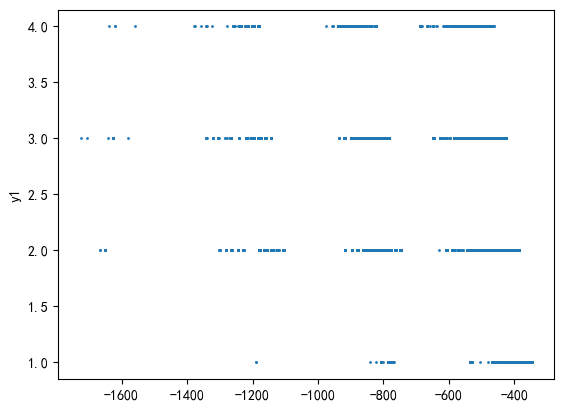

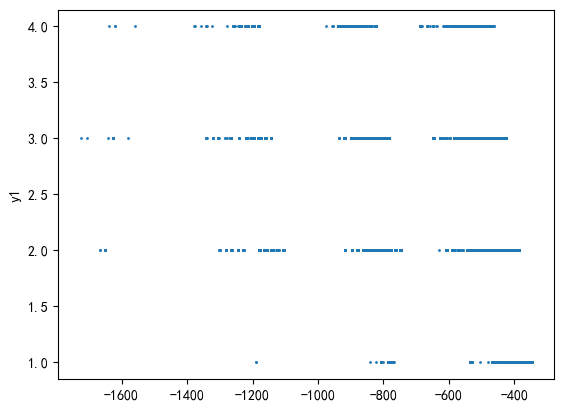

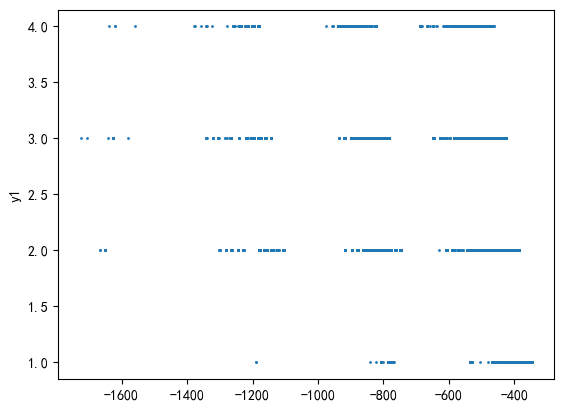

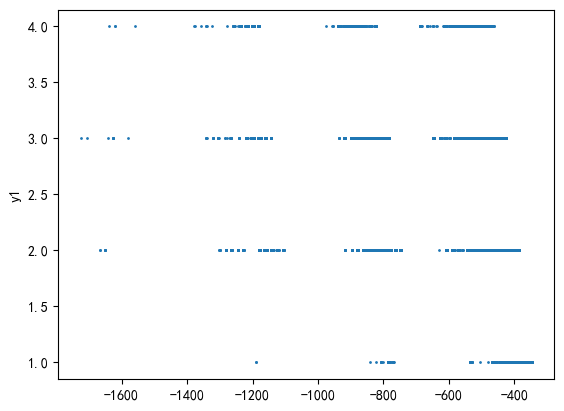

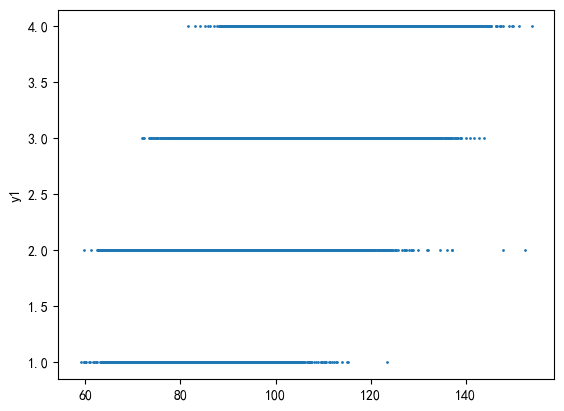

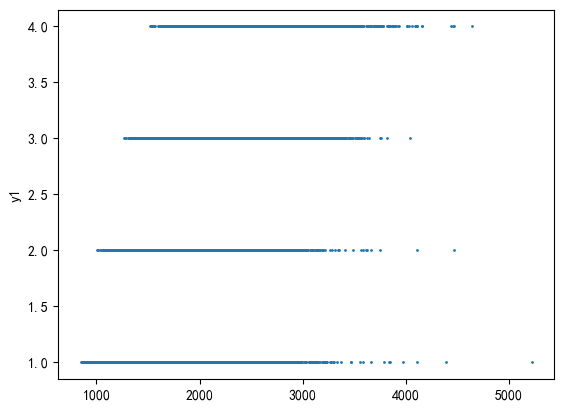

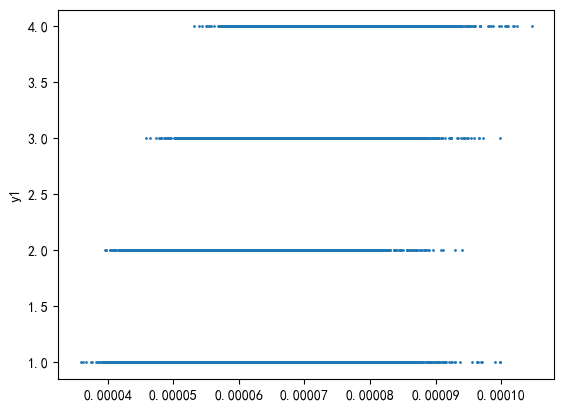

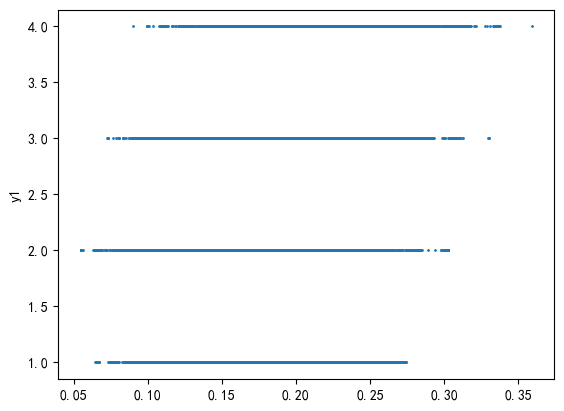

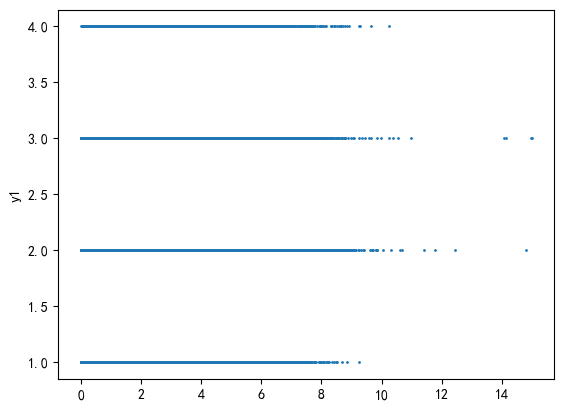

In [14]:
for i in range(X.shape[1]):
    plt.figure(i)
    plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
    plt.rcParams['axes.unicode_minus'] = False
    plt.scatter(X.iloc[:,i], Y, s=1)
    plt.ylabel('y1')
    plt.show()

# 2.分类神经网络

In [2]:
from sklearn.neural_network import MLPClassifier as CNN 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score as cv 
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from time import time
import datetime
from sklearn.preprocessing import StandardScaler

## 3.1交叉验证 

In [30]:
#标准化
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X)  
Xstandar = scaler.transform(X)
# apply same transformation to test data
# Xtest = scaler.transform(Xtest)
#Xpre = scaler.transform(Xpre)

In [3]:
cv?

Signature:
cv(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None
    A str (s

In [32]:
# 交叉验证
times = time()
cnn = CNN(hidden_layer_sizes=(10,10),random_state=420, max_iter=500) #建立神经网络
print(cv(cnn,Xstandar,Y,cv=10).mean()) #交叉验证
print(time() - times) #计算时间

0.992885
409.2137553691864


## 3.2 分类

In [52]:
# 预测集
data_pre = pd.read_csv(r'C:\Users\25492\Desktop\2024年第四届长三角高校数学建模竞赛赛题\2024长三角选题B：人工智能范式的物理化学家\predict.csv')
data_pre

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,200001,NaN,NaN,NaN,NaN,0.226002,0.000065,0.132347,-368.670646,96.074011,...,11.071498,5.344349,157.391719,1733.105035,2139.033470,7279.073141,3484.772300,16080.595800,483.744199,89.146409
1,200002,NaN,NaN,NaN,NaN,0.214187,0.000066,0.130316,-384.732758,91.627267,...,0.178717,24.201402,39.395577,966.750678,3040.168365,11974.531830,2475.110471,12965.566730,18545.231230,689.034235
2,200003,NaN,NaN,NaN,NaN,0.197361,0.000073,0.127443,-367.439885,93.450897,...,76.092241,46.457823,443.755989,86.140490,1499.171629,17987.834790,3445.933673,7086.954277,2308.805257,337.999121
3,200004,NaN,NaN,NaN,NaN,0.215407,0.000062,0.135675,-384.716532,90.438786,...,165.951655,50.797138,192.244542,1611.385190,1041.286098,10741.318960,1557.125375,39992.132000,2207.866124,506.676925
4,200005,NaN,NaN,NaN,NaN,0.214432,0.000067,0.131066,-384.734795,89.197619,...,133.350895,65.631929,655.591805,2600.614565,584.201129,27283.461340,2535.635844,13134.988300,16068.260120,477.398232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,202576,NaN,NaN,NaN,NaN,0.158960,0.000058,0.084260,-398.477759,92.527055,...,164.927555,2.287917,857.357218,2512.784553,636.566533,9635.446798,380.996713,500.848858,23088.564540,499.314824
2576,202577,NaN,NaN,NaN,NaN,0.158984,0.000058,0.087399,-398.473992,89.497411,...,37.542901,44.214331,637.825723,2453.167587,3154.271089,10300.033380,1867.004962,2550.848129,22304.561400,344.708545
2577,202578,NaN,NaN,NaN,NaN,0.158988,0.000058,0.087139,-398.474052,89.550594,...,0.403145,35.282849,286.439254,812.043686,2792.998726,17244.491480,103.067156,16822.422600,18641.183190,230.273167
2578,202579,NaN,NaN,NaN,NaN,0.215280,0.000075,0.084348,-476.991234,115.581030,...,22.728919,58.773078,655.551793,681.650837,1184.057337,13679.670150,1285.024629,29956.280710,10683.200390,351.671268


In [70]:
# 预测指标
Xpre =  data_pre.iloc[:, 5:]
Xpre = Xpre.iloc[:,index]
Xpre

,x4,x7,x6,x5,x9,x2,x1,x8,x3,x21
0,-368.670646,-368.669702,-368.681892,96.074011,2287.013453,0.000065,0.226002,0.819730,0.132347,4463.781635
1,-384.732758,-384.731814,-384.744010,91.627267,1518.375500,0.000066,0.214187,3.928610,0.130316,21.390974
2,-367.439885,-367.438941,-367.453626,93.450897,1829.259159,0.000073,0.197361,0.908149,0.127443,198.109155
3,-384.716532,-384.715588,-384.727318,90.438786,1593.916745,0.000062,0.215407,2.997407,0.135675,5395.800003
4,-384.734795,-384.733851,-384.745961,89.197619,1259.899439,0.000067,0.214432,4.176791,0.131066,2895.269818
...,...,...,...,...,...,...,...,...,...,...
2575,-398.477759,-398.476815,-398.487127,92.527055,1291.045238,0.000058,0.158960,1.801190,0.084260,2980.808164
2576,-398.473992,-398.473048,-398.483464,89.497411,1271.075929,0.000058,0.158984,1.394832,0.087399,6651.241836
2577,-398.474052,-398.473107,-398.483517,89.550594,1270.910835,0.000058,0.158988,1.823909,0.087139,2013.568170
2578,-476.991234,-476.990290,-477.003702,115.581030,1971.275750,0.000075,0.215280,1.901666,0.084348,1662.600246


In [71]:
#标准化
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X)  
Xstandar = scaler.transform(X)
# apply same transformation to test data
#Xtest = scaler.transform(Xtest)
Xpre = scaler.transform(Xpre)

In [72]:
cnn = CNN(hidden_layer_sizes=(10,10),random_state=420, max_iter=500) #建立神经网络
cnn.fit(Xstandar,Y)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=420)

In [73]:
Y_pre = cnn.predict(Xpre)
Y_pre

array([1, 1, 1, ..., 1, 3, 3], dtype=int64)

In [74]:
# 创建空的DataFrame
df = pd.DataFrame(Y_pre, columns=['class'])

# 将DataFrame写入CSV文件
df.to_csv('class_pre.csv', index=False)

## 3.2 测试效果可视化

In [48]:
#数据切分
Xtrain, Xtest, Ytrain, Ytest = TTS(X,Y,test_size=0.3,random_state=420)

In [49]:
#标准化
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)
# apply same transformation to test data
Xtest = scaler.transform(Xtest)
#Xpre = scaler.transform(Xpre)

In [50]:
cnn = CNN(hidden_layer_sizes=(10,10),random_state=420, max_iter=500) #建立神经网络
cnn.fit(Xtrain,Ytrain)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=420)

In [51]:
# 测试
Ytest_pre = cnn.predict(Xtest)
Ytest_pre

array([1, 1, 3, ..., 4, 2, 2], dtype=int64)

In [52]:
# 测试评估
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
report = classification_report(Ytest, Ytest_pre)
print(report)
accuracy_rate = sum(Ytest==Ytest_pre)/len(Ytest)
print(accuracy_rate)
c = confusion_matrix(Ytest, Ytest_pre)
print(c)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10396
           2       1.00      1.00      1.00     35562
           3       0.99      0.99      0.99     11259
           4       0.98      0.98      0.98      2783

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

0.9948666666666667
[[10371    25     0     0]
 [    6 35467    89     0]
 [    0    72 11130    57]
 [    0     1    58  2724]]


In [53]:
cnn.loss_curve_

[0.6535188356667303,
 0.17184823622547293,
 0.10897369152070986,
 0.08380557224938066,
 0.06901681264065004,
 0.05933909640500795,
 0.052660039848063805,
 0.04778275845134149,
 0.043832595985829566,
 0.04103495844574313,
 0.0392946851252821,
 0.03744726855110948,
 0.035971332567390414,
 0.03494422843521464,
 0.033888810188589615,
 0.0329462649979529,
 0.032023103711478824,
 0.030969247086932047,
 0.02984132166810111,
 0.02870494026961304,
 0.027687993504709494,
 0.026509372492754556,
 0.0250553687021546,
 0.024192620589143808,
 0.022933355575579756,
 0.02195279311198302,
 0.021097263891905714,
 0.020590003527788635,
 0.020096046199279474,
 0.019527952775823094,
 0.01902032064978641,
 0.01850851957618177,
 0.018114273897143582,
 0.017872904561550555,
 0.017468603587521437,
 0.017205199224271737,
 0.01680268584038831,
 0.01654717290512565,
 0.016388333350767836,
 0.016203862899936864,
 0.016079959633230438,
 0.015982364459131267,
 0.015618524163973191,
 0.01535070215888396,
 0.0151643236

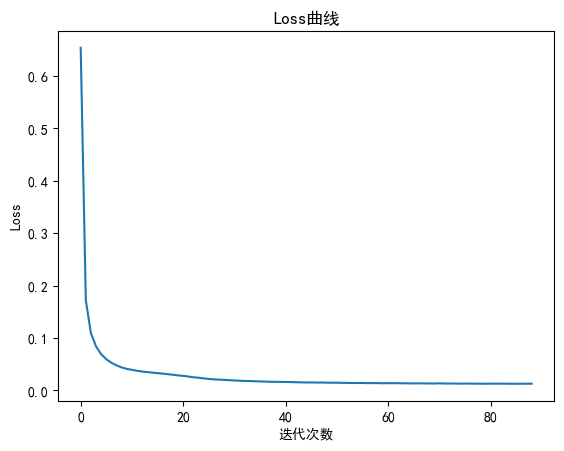

In [60]:
loss = cnn.loss_curve_
plt.figure()
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.plot(range(len(loss)), loss)
plt.title('Loss曲线')
plt.ylabel('Loss')
plt.xlabel('迭代次数')
plt.savefig('class预测神经网络Loss曲线.png')
plt.show()

In [61]:
cnn.best_loss_

0.01268163228209449

# 3. 单个决策树和AdaBoost回归器

In [23]:
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC

In [45]:
times = time()
regr_1 = DTC(max_depth=200)
print(cv(regr_1,X,Y,cv=10).mean())
print(time()-times)

0.99246
25.212666511535645


In [46]:
times = time()
regr_2 = ABC(DTC(max_depth=200), n_estimators=100, random_state=420)
print(cv(regr_2,X,Y,cv=10).mean())
print(time()-times)

0.9920450000000001
31.388429880142212
